# Data Pre Processing#
**This part of code is used to prepare data for neural net work training**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sklearn.decomposition import PCA
from numpy import expand_dims
from sklearn.model_selection import train_test_split

# **Data Visualization** #

The Following cell decompose the Whole Spectrum to Several part, which make it easier for Visulize the difference between each Temperature

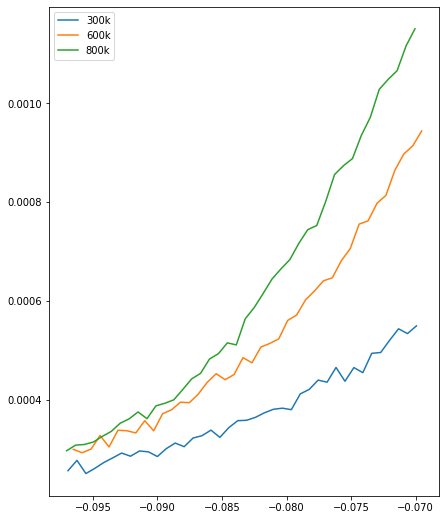

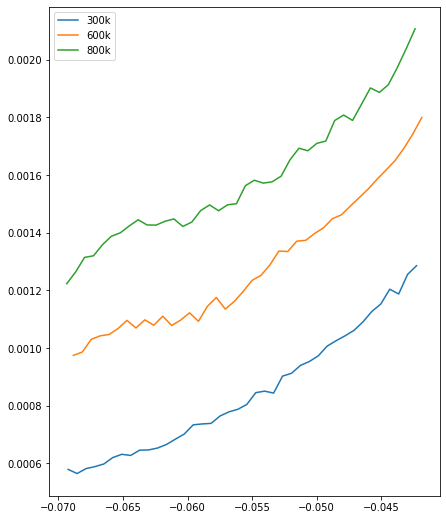

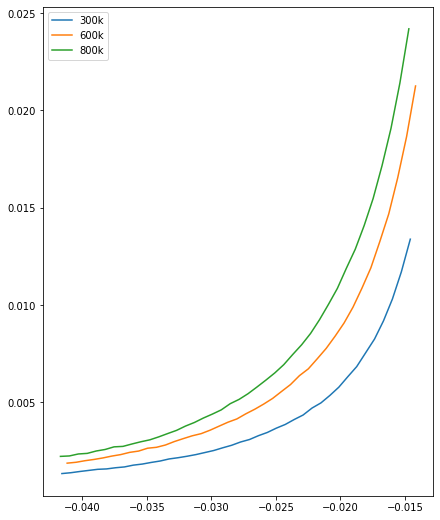

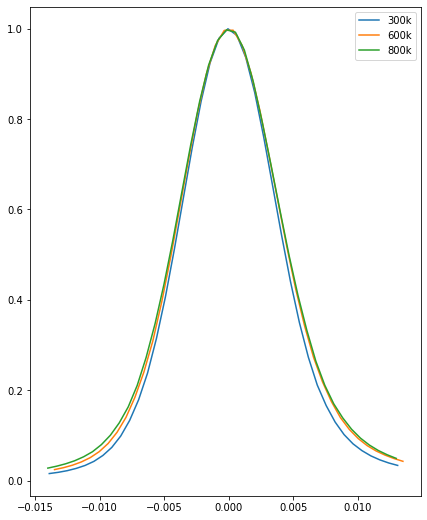

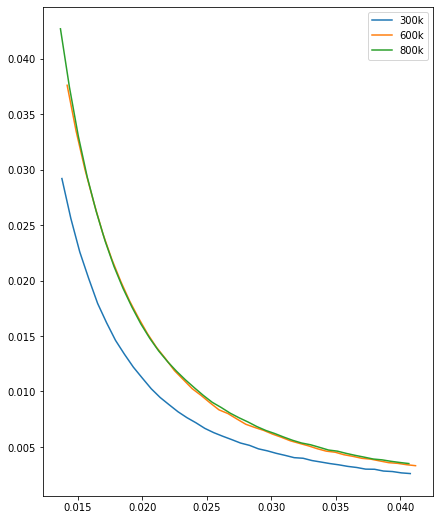

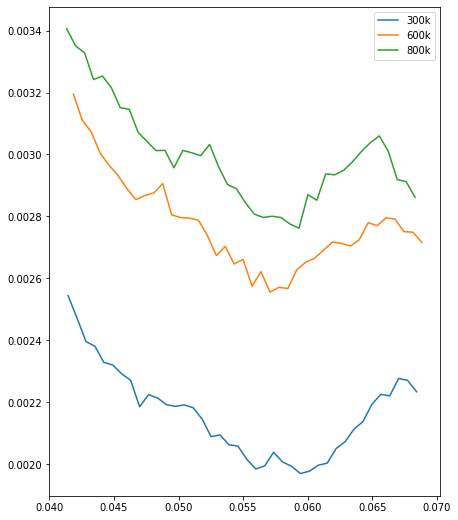

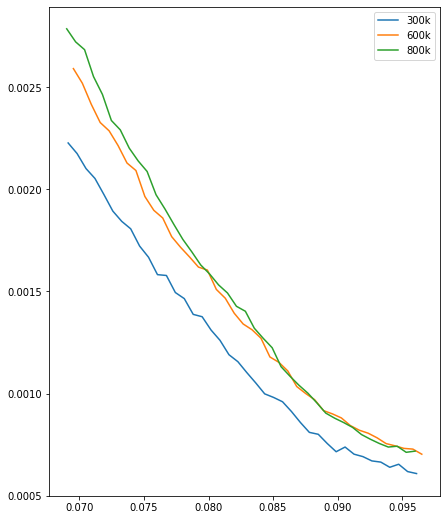

In [7]:
Temp=['300k','600k','800k']
step=40
for j in range(7):
    lower=600+(j-1)*step
    upper=600+j*step
    fig= plt.figure(figsize=(7,9))
    for i in Temp:
        df=pd.read_table('cube5-{}-30-2s-2V-b-Normalized.dat'.format(i))
        plt.plot(df['x'][lower:upper],df['y'][lower:upper],label=i)
        plt.legend()

# Expanding the Data from 3 to 21_Making the New Index# 

The following code excute the order to expand the data set, so there is enough data for training and testing. 
The way for expanding the data:
_if we have data for 300K and 600K, we can create a data between them, namely $$(300+600)/2=450K$$, same process will be done to the spectrum for 300K and 600k_ 

In [2]:
def index(df300,df600,df800):
    num=3
    Li=[df300,df600,df800]
    for k in range(3):
        for i in range(num):
            Li.insert(i+1,(Li[i]+Li[i+1])/2)
    for k in range(3):
        for i in range(num):
            Li.insert(-i-1,(Li[-i-1]+Li[-i-2])/2)
    #print(Li)
    Tem=[300,600,800]
    for k in range(3):
        for j in range(num):
            Tem.insert(j+1,(Tem[j]+Tem[j+1])/2)
    for k in range(3):
        for j in range(num):
            Tem.insert(-j-1,(Tem[-j-1]+Tem[-j-2])/2)
    return Li,Tem

# **Data Extracting and Reorgainzed** #

Based on Dr.Maureen Joel Lagos, the spectrum between -30meV and 30meV may be distracting or relate to the ZLP (the zero loss peak). Thus, the data has been collected into several type, so make it easier for the training. 
All data Saved in .csv format

**The Types are Following**
- Peak Only Data (No x-axis)
- No x-axis and No peak (The peak refer to the ZLP)
- Whole data without x-axis
- Whole data (all information included)

In [ ]:
df300=pd.read_table('cube5-300K-30-2s-2V-b-Normalized.dat')['y'].values[270:1130]
df600=pd.read_table('cube5-600K-30-2s-2V-b-Normalized.dat')['y'].values[270:1130]
df800=pd.read_table('cube5-800K-30-2s-2V-b-Normalized.dat')['y'].values[270:1130]
Li,Tem=index(df300,df600,df800)
Fin={}
for jj in range(len(Tem)):
    Fin['{}K'.format(Tem[jj])]=Li[jj]
df=DataFrame(Fin)
df.set_index('300K',inplace=True)
df.to_csv('PeakOnlyData.csv')

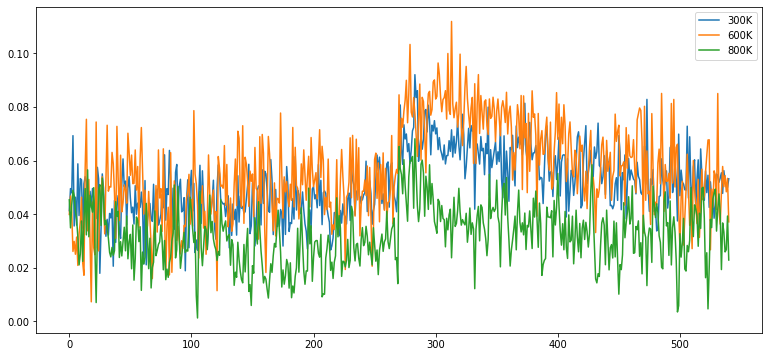

In [8]:
df300=[item for item in (pd.read_table('cube5-300K-30-2s-2V-b-Normalized.dat')['y'].values*1000+0.045)]
df600=[item for item in (pd.read_table('cube5-600K-30-2s-2V-b-Normalized.dat')['y'].values*1000+0.045)]
df800=[item for item in (pd.read_table('cube5-800K-30-2s-2V-b-Normalized.dat')['y'].values*1000+0.045)]
del df300[270:1130]
del df600[270:1130]
del df800[270:1130]
df300=np.array(df300)
df600=np.array(df600)
df800=np.array(df800)
Li,Tem=index(df300,df600,df800)
Fin={}
for jj in range(len(Tem)):
    Fin['{}K'.format(Tem[jj])]=Li[jj]
df=DataFrame(Fin)
df.set_index('300K',inplace=True)
l=['300K','600K','800K']
N=[df300,df600,df800]
fig= plt.figure(figsize=(13,6))
for i in range(len(N)):
    plt.plot(N[i],label=l[i])
plt.legend()
df.to_csv('Nox_PeakRemoved.csv')

In [6]:
df300=pd.read_table('cube5-300K-30-2s-2V-b-Normalized.dat')['y'].values
df600=pd.read_table('cube5-600K-30-2s-2V-b-Normalized.dat')['y'].values
df800=pd.read_table('cube5-800K-30-2s-2V-b-Normalized.dat')['y'].values
Li,Tem=index(df300,df600,df800)
Fin={}
for jj in range(len(Tem)):
    Fin['{}K'.format(Tem[jj])]=Li[jj]
df=DataFrame(Fin)
df.set_index('300K',inplace=True)
df.to_csv('WholeData.csv')

In [8]:
df300=pd.read_table('cube5-300K-30-2s-2V-b-Normalized.dat')['y'].values
df600=pd.read_table('cube5-600K-30-2s-2V-b-Normalized.dat')['y'].values
df800=pd.read_table('cube5-800K-30-2s-2V-b-Normalized.dat')['y'].values
dfx=pd.read_table('cube5-300K-30-2s-2V-b-Normalized.dat')['x'].values
Li,Tem=index(df300,df600,df800)
Fin={}
Fin['X']=dfx
for jj in range(len(Tem)):
    Fin['{}K'.format(Tem[jj])]=Li[jj]
df=DataFrame(Fin)
df.set_index('X',inplace=True)
df.to_csv('WholewithX.csv')

In [9]:
df

,337.5K,356.25K,365.625K,375.0K,412.5K,431.25K,450.0K,525.0K,562.5K,600K,625.0K,650.0K,700.0K,712.5K,725.0K,750.0K,756.25K,762.5K,775.0K,800K
300K,,,,,,,,,,,,,,,,,,,,
-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-4.254770e-06,-4.342943e-06,-4.431115e-06,-0.000005,-0.000005,-0.000005,-4.453809e-06,-0.000004,-0.000002,-2.064406e-06,-1.723062e-06,-0.000001,-8.697040e-07,-6.990324e-07,-3.576890e-07,3.249978e-07
0.000005,0.000004,0.000004,0.000004,0.000004,3.487546e-06,3.314470e-06,3.141395e-06,0.000002,0.000002,0.000002,2.702251e-07,-0.000001,-0.000004,-4.932760e-06,-5.676043e-06,-0.000007,-7.534252e-06,-7.905894e-06,-8.649178e-06,-1.013574e-05
0.000003,0.000002,0.000002,0.000001,0.000001,1.823819e-07,-2.720290e-07,-7.264400e-07,-0.000003,-0.000003,-0.000004,-4.010842e-06,-0.000004,-0.000003,-2.782743e-06,-2.607300e-06,-0.000002,-2.168693e-06,-2.080972e-06,-1.905529e-06,-1.554643e-06
0.000024,0.000019,0.000016,0.000015,0.000013,8.072955e-06,5.372355e-06,2.671756e-06,-0.000008,-0.000014,-0.000019,-1.607782e-05,-0.000013,-0.000008,-6.084543e-06,-4.656931e-06,-0.000002,-1.087903e-06,-3.740973e-07,1.053514e-06,3.908737e-06
-0.000009,-0.000010,-0.000011,-0.000011,-0.000011,-1.160052e-05,-1.196058e-05,-1.232065e-05,-0.000014,-0.000014,-0.000015,-1.306090e-05,-0.000011,-0.000007,-5.569966e-06,-4.499833e-06,-0.000002,-1.824500e-06,-1.289434e-06,-2.193011e-07,1.920965e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.000011,0.000010,0.000010,0.000010,0.000010,8.967263e-06,8.593841e-06,8.220420e-06,0.000007,0.000006,0.000005,3.120377e-06,0.000001,-0.000003,-4.273975e-06,-5.330311e-06,-0.000007,-7.971151e-06,-8.499319e-06,-9.555655e-06,-1.166833e-05
0.000007,0.000007,0.000008,0.000008,0.000008,7.945175e-06,8.089793e-06,8.234410e-06,0.000009,0.000009,0.000009,5.828452e-06,0.000002,-0.000005,-6.641684e-06,-8.423132e-06,-0.000012,-1.287675e-05,-1.376748e-05,-1.554892e-05,-1.911182e-05
0.000005,0.000005,0.000005,0.000005,0.000005,4.428496e-06,4.317280e-06,4.206064e-06,0.000004,0.000004,0.000003,6.168033e-07,-0.000002,-0.000007,-8.831566e-06,-1.018133e-05,-0.000013,-1.355575e-05,-1.423063e-05,-1.558040e-05,-1.827994e-05
